<a href="https://colab.research.google.com/github/shapi88/tensorflow_book/blob/main/02_neural_network_classification_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to neural network classification with TensorFlow

In this notebook we're going to learn how to write neural networks for classification problems.

A classification is where you try to classify something as one thing or another.

A few types of classification problems:

* Binary classification
* Mutliclass classification
* Multilabel classification

See full course materials on GitHub: https://github.com/mrdbourke/tensorflow-deep-learning/



📖 **In machine learning**, classification is a common task where the goal is to assign input data points to predefined categories or classes. There are several types of classification problems in ML, including:

* **Binary Classification:** In binary classification, the problem involves classifying instances into one of two classes or categories. For example, determining whether an email is spam or not spam.

* **Multiclass Classification:** Multiclass classification refers to problems where there are more than two classes or categories to predict. Each data point is assigned to one and only one class. An example is classifying images of fruits into categories like apple, orange, or banana.

* **Multilabel Classification:** In multilabel classification, each instance can be assigned to multiple classes simultaneously. The task involves predicting a set of labels or categories that are relevant to a given input. For instance, classifying documents into multiple topics or assigning multiple tags to an image.

* **Imbalanced Classification:** Imbalanced classification problems occur when the classes in the dataset have significantly different numbers of instances. Typically, one class is a minority class, while the other(s) are majority classes. This poses challenges, as models tend to be biased towards the majority class. Examples include fraud detection or rare disease diagnosis.

* **Hierarchical Classification:** Hierarchical classification deals with organizing classes into a hierarchical structure or taxonomy. It involves predicting the most specific class at each level of the hierarchy. For instance, classifying documents into a hierarchy of topics, such as Science -> Biology -> Genetics.

* **Ordinal Classification:** Ordinal classification handles situations where the classes have a specific order or rank. The task is to predict the relative order of the classes for each instance. An example is predicting customer satisfaction levels (e.g., low, medium, high) based on feedback.

* **Anomaly Detection:** While not strictly a classification problem, anomaly detection involves identifying rare or unusual instances that do not conform to the expected patterns. It can be seen as a binary classification task, where the goal is to distinguish normal instances from anomalous ones.

These are some common types of classification problems in machine learning. Each type has its own characteristics and specific techniques can be applied to address the challenges associated with each problem type.

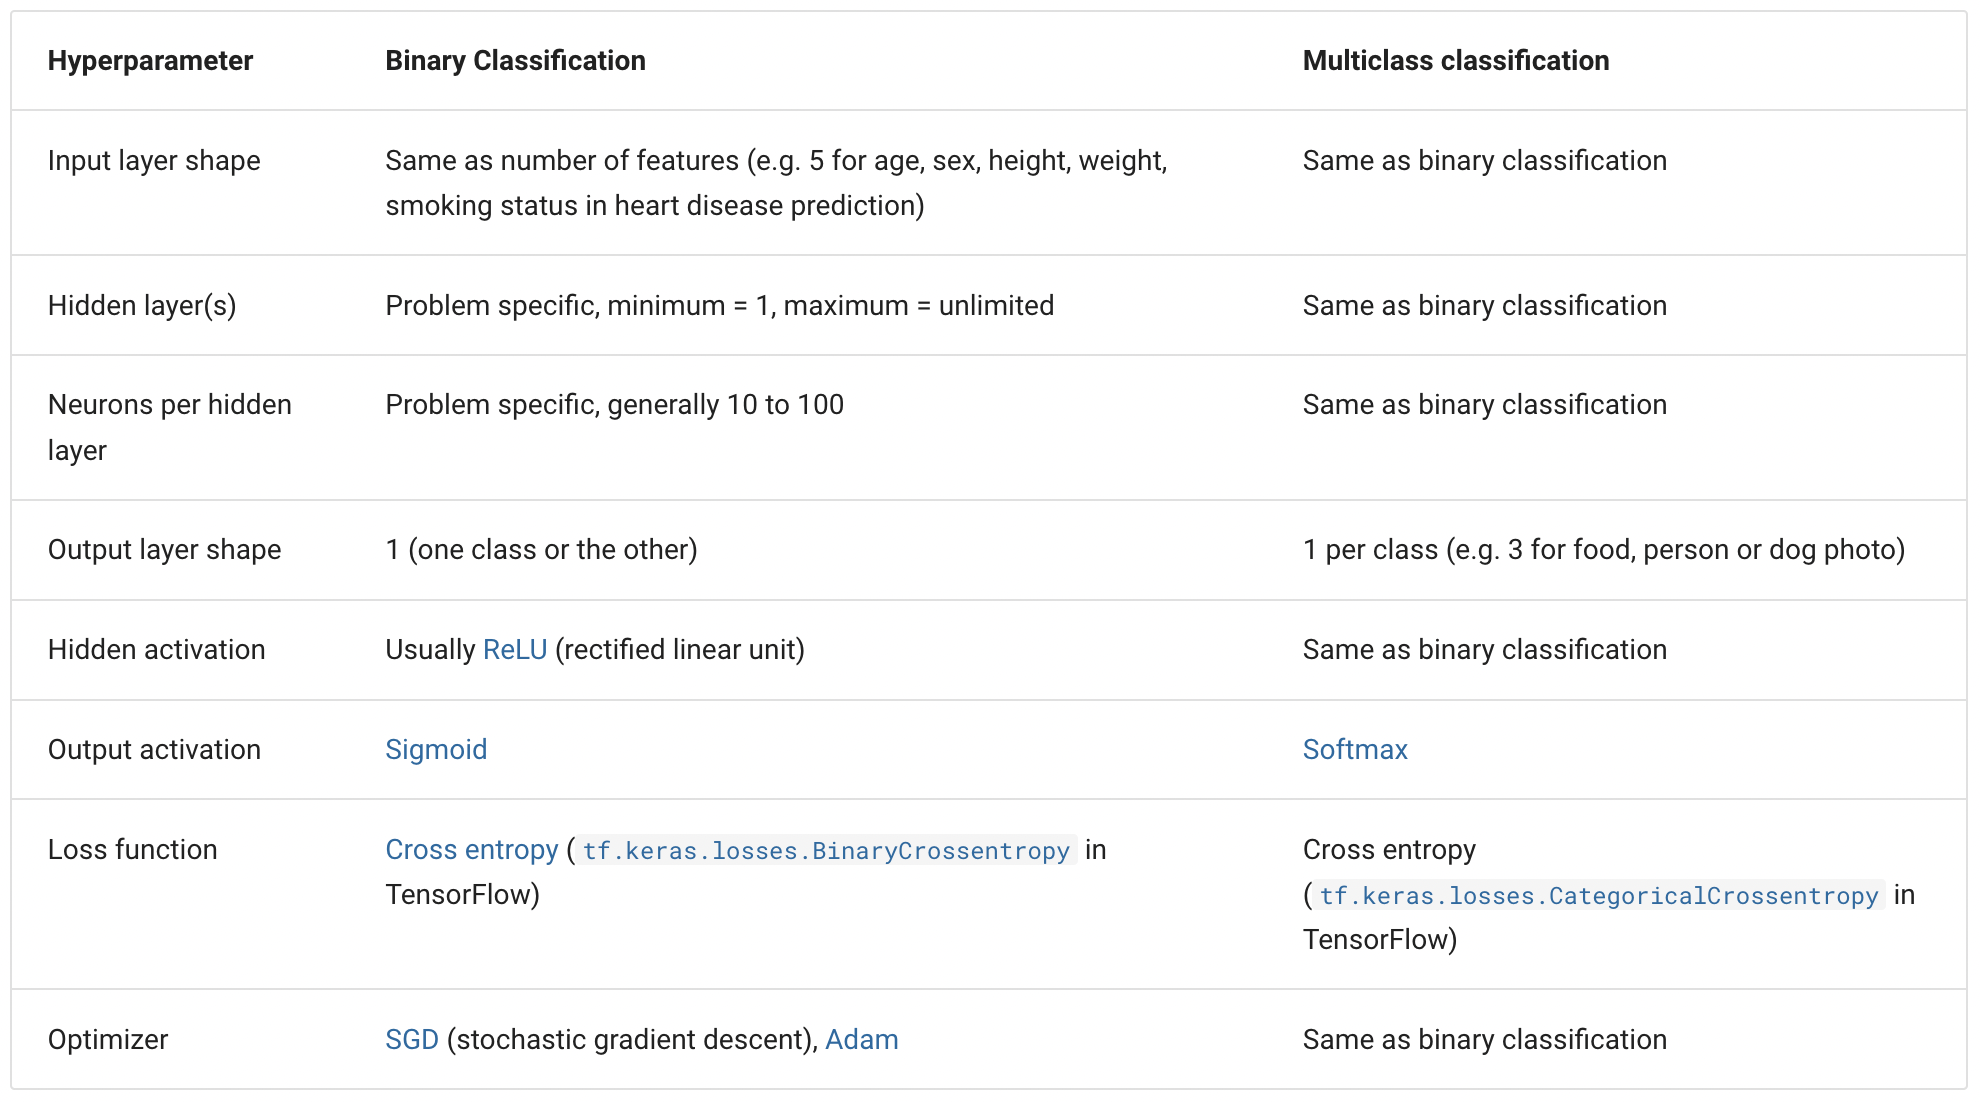

```[python]
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Step 1: Prepare the data
data = pd.read_csv('data.csv')  # Replace 'data.csv' with your dataset file
X = data.drop('target', axis=1)  # Features
y = data['target']  # Target variable

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Step 4: Make predictions on the test set
predictions = model.predict(X_test)

# Step 5: Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)
```

1. First, the data is loaded from a CSV file using pd.read_csv() function. Make sure to replace 'data.csv' with the actual file name and path of your dataset.

2. The features and target variable are separated into X and y respectively.

3. The data is split into training and testing sets using train_test_split() function from scikit-learn. Here, 80% of the data is used for training (X_train, y_train), and 20% is used for testing (X_test, y_test).

4. A Random Forest Classifier is chosen as the classification model. You can choose any other classifier depending on your task.

5. The model is trained on the training data using the fit() method.

6. Predictions are made on the test data using the predict() method.

7. The accuracy of the model is calculated by comparing the predicted labels with the actual labels using accuracy_score().

8. Finally, the accuracy is printed to the console.




# Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

# make 1000 examples
n_samples = 1000

# create circles
X, y = make_circles(n_samples, noise=0.03, random_state=42)

In [2]:
#check features
X[:10]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343],
       [-0.47964637,  0.67643477],
       [-0.01364836,  0.80334872],
       [ 0.77151327,  0.14775959],
       [-0.16932234, -0.79345575],
       [-0.1214858 ,  1.02150905]])

In [3]:
#check labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [4]:
import pandas as pd

circles = pd.DataFrame({'X0': X[:, 0], "X1": X[:, 1], "Label": y})
circles

X0        X1  Label
0    0.754246  0.231481      1
1   -0.756159  0.153259      1
2   -0.815392  0.173282      1
3   -0.393731  0.692883      1
4    0.442208 -0.896723      0
..        ...       ...    ...
995  0.244054  0.944125      0
996 -0.978655 -0.272373      0
997 -0.136900 -0.810012      1
998  0.670362 -0.767502      0
999  0.281057  0.963824      0

[1000 rows x 3 columns]

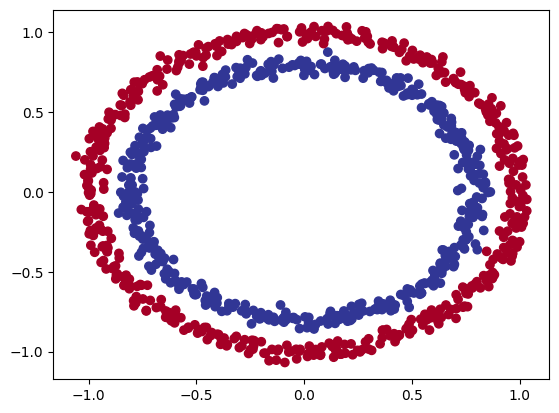

In [5]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

🛠 **Exercise**: Before pushing forward, spend 10-minutes playing around with *playground.tensorflow.org* building and running different neural networks. See what happens when you change different hyperparameters.

## Input and output shapes

In [6]:
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
# How many samples we're working
len(X), len(y)

(1000, 1000)

In [8]:
# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modeling 
The steps in modelling with TensorFlow are typically:

Create or import a model
Compile the model
Fit the model
Evaluate the model
Tweak
Evaluate...

In [9]:
# Import TensorFlow
import tensorflow as tf
tf.__version__

'2.12.0'

In [10]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)                              
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 5ms/step - loss: 3.0223 - accuracy: 0.4930
Epoch 2/5
32/32 [==============================] - 0s 4ms/step - loss: 0.7573 - accuracy: 0.4930
Epoch 3/5
32/32 [==============================] - 0s 5ms/step - loss: 0.7121 - accuracy: 0.4910
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6998 - accuracy: 0.4920
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6960 - accuracy: 0.4950


In [11]:
# Let's try and improve our model by training for longer...
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

Since we're working on a binary classification problem and our model is getting around ~50% accuracy... it's performing as if it's guessing.

So let's step things up a notch and add an extra layer.

In [12]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model, this time with 2 layers
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)                                                             
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_2.fit(X, y, epochs=100, verbose=0)

In [13]:

# 4. Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5000


[0.6932369470596313, 0.5]

In [14]:
circles["Label"].value_counts()

1    500
0    500
Name: Label, dtype: int64

## Improving our model

Let's look into our bag of tricks to see how we can improve our model.

Create a model - we might to add more layers or increase the number of hidden units within a layer.
Compiling a model - here we might to choose a different optimization function such as Adam instead of SGD.
Fitting a model - perhaps we might fit our model for more epochs (leave it training for longer).

In [15]:
# Set random seed
tf.random.set_seed(42)
 
# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
  ## Before TensorFlow 2.7.0
  # tf.keras.layers.Dense(100), # add 100 dense neurons
 
  ## After TensorFlow 2.7.0
  tf.keras.layers.Dense(100, input_shape=(None, 1)), # <- define input_shape here
  tf.keras.layers.Dense(10), # add another layer with 10 neurons
  tf.keras.layers.Dense(1)
])
 
# 2. Compile the model
history = model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(), # use Adam instead of SGD
                metrics=['accuracy'])

model_3.evaluate(X, y)

32/32 [==============================] - 1s 2ms/step - loss: 4.7385 - accuracy: 0.5000


[4.738529682159424, 0.5]

In [16]:
model_3.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 4.7385 - accuracy: 0.5000


[4.738529682159424, 0.5]

In [17]:
tf.random.set_seed(42)

# 1. create model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. compile the model
model_4.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# 3. fit the model
history = model_4.fit(X, y, epochs=55, verbose=0)

Text(0.5, 0, 'epochs')

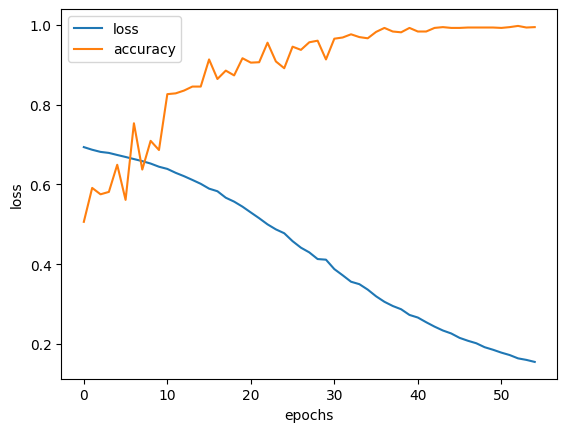

In [18]:
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

In [19]:
# 4. Evaluate the model
model_4.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.1482 - accuracy: 0.9950


[0.14818696677684784, 0.9950000047683716]

In [20]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 100)               300       
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,321
Trainable params: 1,321
Non-trainable params: 0
_________________________________________________________________


Text(0.5, 0, 'epochs')

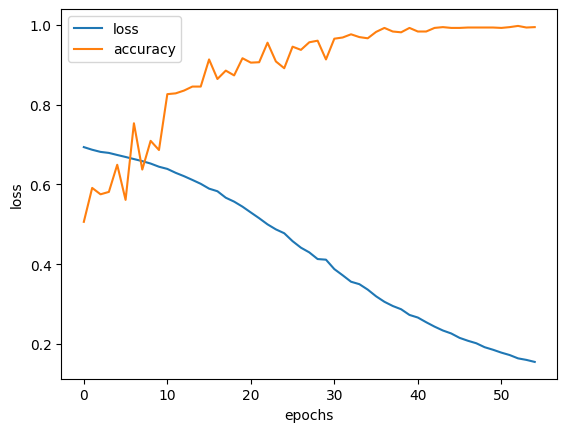

In [21]:
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

🔑 **Note**: Whenever your model is performing strangely or there's something going on with your data you're not quite sure of, remember these three words: **visualize, visualize, visualize**. Inspect your data, inspect your model, inpsect your model's predictions.

To visulize our model's predictions, let's create a function plot_decision_boundary(), this function will:

* Take in a trained model, features (X) and labels (y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones (where each unique class falls)

In [22]:
import numpy as np

In [23]:
model_3.predict(X[:10])

1/1 [==============================] - 0s 385ms/step


array([[[-0.05039632],
        [-0.01546678]],

       [[ 0.05052412],
        [-0.01024025]],

       [[ 0.05448189],
        [-0.01157814]],

       [[ 0.02630782],
        [-0.04629618]],

       [[-0.0295469 ],
        [ 0.05991619]],

       [[ 0.03204843],
        [-0.04519714]],

       [[ 0.00091194],
        [-0.05367717]],

       [[-0.05155002],
        [-0.00987282]],

       [[ 0.01131356],
        [ 0.05301615]],

       [[ 0.00811729],
        [-0.0682539 ]]], dtype=float32)

In [24]:
model_4.predict(X[:10])

1/1 [==============================] - 0s 291ms/step


array([[0.8789126 ],
       [0.97644436],
       [0.90633523],
       [0.85475093],
       [0.08223041],
       [0.74254173],
       [0.86993164],
       [0.88169104],
       [0.92805135],
       [0.14466812]], dtype=float32)

32/32 [==============================] - 0s 3ms/step


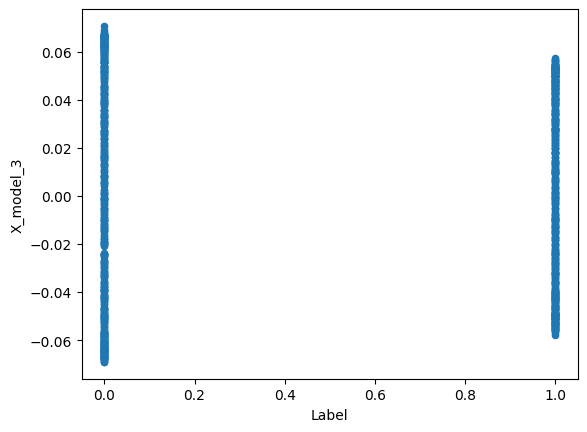

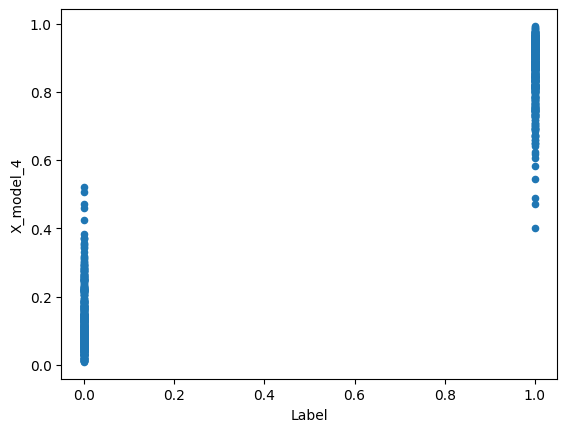

In [25]:
def plot_things_up(X=X, y=y):
  X_3 = (model_3.predict(X[:1000]))
  X_4 = (model_4.predict(X[:1000]))
  data = pd.DataFrame({
      "X_model_3": X_3[:,0][:,0],
      "X_model_4": X_4[:,0],
      "Label": y
  })
  data.plot(kind="scatter", y="X_model_3", x="Label")
  data.plot(kind="scatter", y="X_model_4", x="Label")
  plt.show()

plot_things_up()

In [26]:
x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 1
x_min, x_max 

(-1.1595024599098636, 2.0337117525463375)

In [27]:
y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 1
y_min, y_max

(-1.1677683182718437, 2.0360036756154805)

In [28]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function was inspired by two resources:
   1. https://cs231n.github.io/neural-networks-case-study/
   2. https://github.com/madewithml/basics/blob/master/notebooks/09_Multilayer_Perceptrons/09_TF_Multilayer_Perceptrons.ipynb 
  """

  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + .1
  
  y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + .1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))
  
  # Create X value (we're going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class or binary
  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 2ms/step
doing multiclass classification


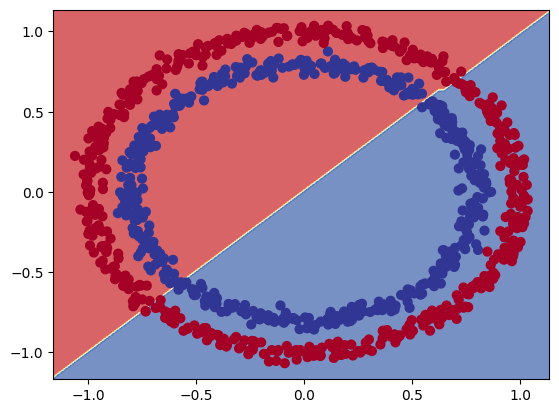

In [29]:
plot_decision_boundary(model_3, X=X, y=y)

313/313 [==============================] - 1s 2ms/step
doing binary classification


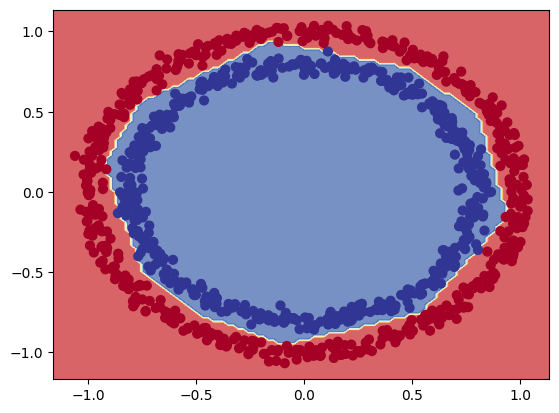

In [30]:
plot_decision_boundary(model_4, X=X, y=y)

In [31]:
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))
xx, yy

(array([[-1.15950246, -1.12724777, -1.09499308, ...,  1.96920237,
          2.00145706,  2.03371175],
        [-1.15950246, -1.12724777, -1.09499308, ...,  1.96920237,
          2.00145706,  2.03371175],
        [-1.15950246, -1.12724777, -1.09499308, ...,  1.96920237,
          2.00145706,  2.03371175],
        ...,
        [-1.15950246, -1.12724777, -1.09499308, ...,  1.96920237,
          2.00145706,  2.03371175],
        [-1.15950246, -1.12724777, -1.09499308, ...,  1.96920237,
          2.00145706,  2.03371175],
        [-1.15950246, -1.12724777, -1.09499308, ...,  1.96920237,
          2.00145706,  2.03371175]]),
 array([[-1.16776832, -1.16776832, -1.16776832, ..., -1.16776832,
         -1.16776832, -1.16776832],
        [-1.13540699, -1.13540699, -1.13540699, ..., -1.13540699,
         -1.13540699, -1.13540699],
        [-1.10304565, -1.10304565, -1.10304565, ..., -1.10304565,
         -1.10304565, -1.10304565],
        ...,
        [ 1.97128101,  1.97128101,  1.97128101, ...,  

In [32]:
xx.shape, yy.shape

((100, 100), (100, 100))

In [33]:
len(xx)

100

In [34]:
xx.mean(), yy.mean()

(0.43710464631823714, 0.43411767867181844)

In [35]:
xx.ravel().shape, xx.shape

((10000,), (100, 100))

In [36]:
xx

array([[-1.15950246, -1.12724777, -1.09499308, ...,  1.96920237,
         2.00145706,  2.03371175],
       [-1.15950246, -1.12724777, -1.09499308, ...,  1.96920237,
         2.00145706,  2.03371175],
       [-1.15950246, -1.12724777, -1.09499308, ...,  1.96920237,
         2.00145706,  2.03371175],
       ...,
       [-1.15950246, -1.12724777, -1.09499308, ...,  1.96920237,
         2.00145706,  2.03371175],
       [-1.15950246, -1.12724777, -1.09499308, ...,  1.96920237,
         2.00145706,  2.03371175],
       [-1.15950246, -1.12724777, -1.09499308, ...,  1.96920237,
         2.00145706,  2.03371175]])

In [37]:
# Set random seed
tf.random.set_seed(42)
 
# Create some regression data (<- shape issues)
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = X + 100

# Create some regression data
#X_regression = tf.reshape(np.arange(0, 1000, 5), shape=(1,200))
#y_regression = tf.reshape(np.arange(100, 1100, 5), shape=(1,200))

# Split it into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]
 
# Fit our model to the data
 
## Note: Before TensorFlow 2.7.0, this line would work
# model_3.fit(X_reg_train, y_reg_train, epochs=100) # <- this will error in TensorFlow 2.7.0+

# Fit our model to the regression data
"""
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), # <- expand input dimensions
            y_reg_train,
            epochs=100, verbose=0)
"""
history = model_3.fit(tf.expand_dims(X_reg_train, axis=-1), # <- expand input dimensions
            y_reg_train,
            epochs=100, verbose=0)


Text(0.5, 0, 'epochs')

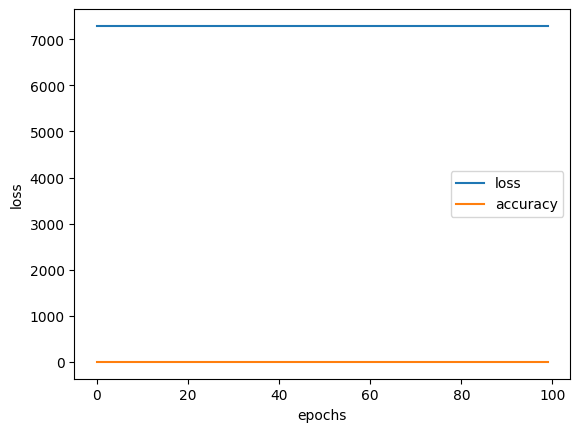

In [38]:
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

In [39]:
X_reg_test, y_reg_test

(<tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([750, 755, 760, 765, 770, 775, 780, 785, 790, 795, 800, 805, 810,
        815, 820, 825, 830, 835, 840, 845, 850, 855, 860, 865, 870, 875,
        880, 885, 890, 895, 900, 905, 910, 915, 920, 925, 930, 935, 940,
        945, 950, 955, 960, 965, 970, 975, 980, 985, 990, 995], dtype=int32)>,
 <tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([ 850,  855,  860,  865,  870,  875,  880,  885,  890,  895,  900,
         905,  910,  915,  920,  925,  930,  935,  940,  945,  950,  955,
         960,  965,  970,  975,  980,  985,  990,  995, 1000, 1005, 1010,
        1015, 1020, 1025, 1030, 1035, 1040, 1045, 1050, 1055, 1060, 1065,
        1070, 1075, 1080, 1085, 1090, 1095], dtype=int32)>)

In [40]:
model_3.evaluate(tf.expand_dims(X_reg_train, axis=-1), tf.expand_dims(y_reg_train, axis=-1))

5/5 [==============================] - 1s 8ms/step - loss: 7288.2886 - accuracy: 0.0000e+00


[7288.28857421875, 0.0]

In [41]:
tf.random.set_seed(42)

#1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

#2. Compile the model
model_3.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae"]
)

#3. Fit the model
history = model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, verbose=0, epochs=100)


Text(0.5, 0, 'epochs')

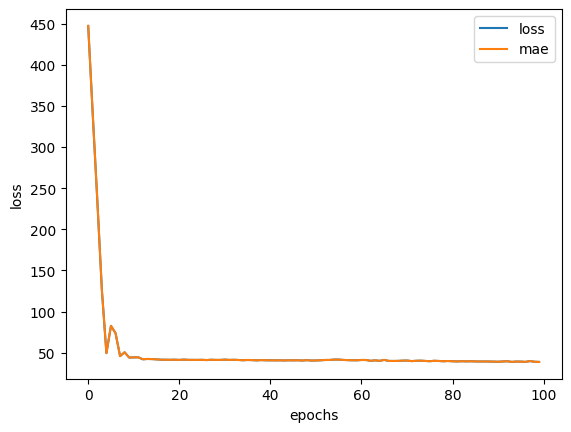

In [42]:
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

In [43]:
model_3.evaluate(tf.expand_dims(X_reg_test, axis=-1), y_reg_test)

2/2 [==============================] - 0s 21ms/step - loss: 62.4404 - mae: 62.4404


[62.4404296875, 62.4404296875]

In [44]:
pred_3 = model_3.predict(X_reg_test)
pred_3[:10]

2/2 [==============================] - 0s 7ms/step


array([[890.65125],
       [896.5406 ],
       [902.4299 ],
       [908.31934],
       [914.2088 ],
       [920.098  ],
       [925.9875 ],
       [931.8768 ],
       [937.76605],
       [943.6554 ]], dtype=float32)

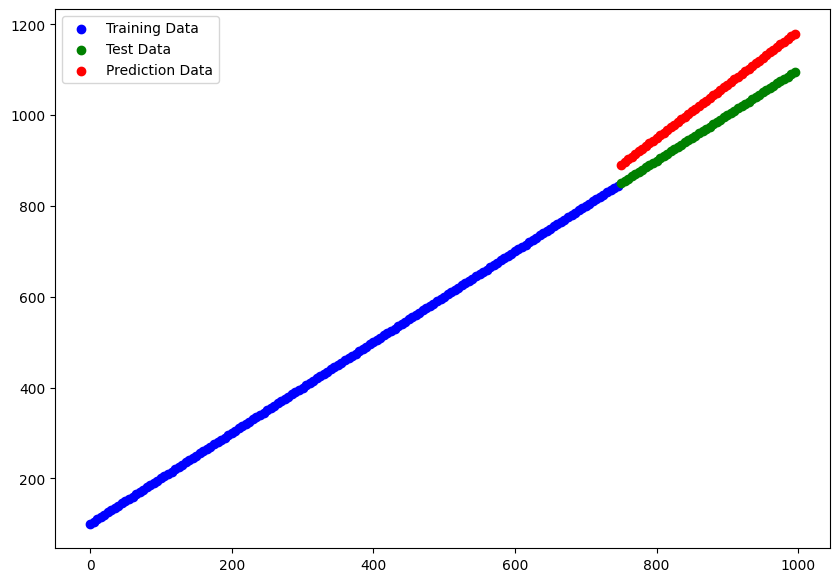

In [45]:
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training Data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test Data")
plt.scatter(X_reg_test, pred_3, c="r", label="Prediction Data")
plt.legend()

Text(0.5, 0, 'epochs')

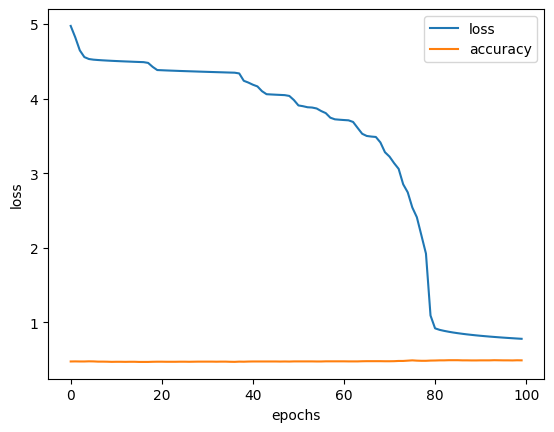

In [46]:
# create a model 5 with linear activation and lr 0.01 Adam optimizer

tf.random.set_seed(42)

#1. Create model
model_5 = tf.keras.Sequential()

#2. Add layer with linear activation
model_5.add(
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
)

#3. Compile model with Adam optimizer learning rate 0.01
model_5.compile(
    #loss=tf.keras.losses.BinaryCrossentropy(),
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

#4. Fit the model
history = model_5.fit(X, y, epochs=100, verbose=0)

#5. Plot training graph
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

In [47]:
model_5.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.7773 - accuracy: 0.4910


[0.7773481011390686, 0.4909999966621399]

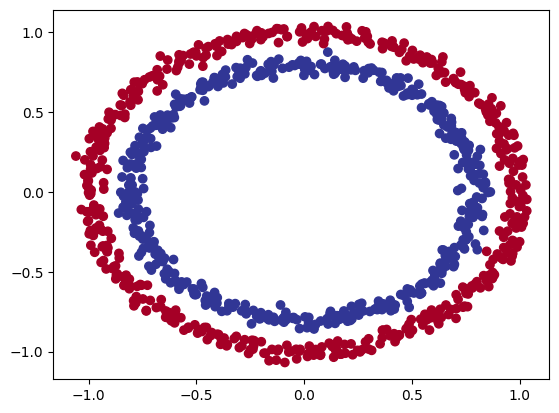

In [48]:
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

313/313 [==============================] - 1s 2ms/step
doing binary classification


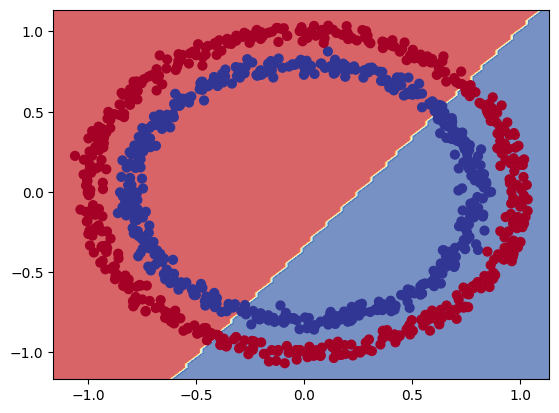

In [49]:
# Check the decision boundary for our latest model
plot_decision_boundary(model=model_5,
                       X=X,
                       y=y)

Text(0.5, 0, 'epochs')

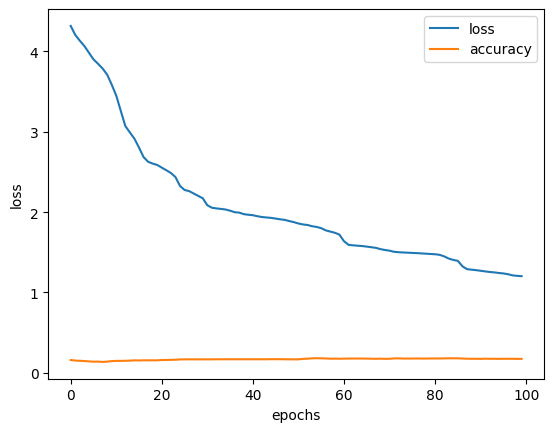

In [50]:
# create a new model with other hyper params
#1. Set random seed
tf.random.set_seed(42)

#2. Create Model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation=tf.keras.activations.relu)
])

model_6.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

history = model_6.fit(X, y, epochs=100, verbose=0)

pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [51]:
pd.DataFrame({"loss": history.history['loss'][:10], "accuracy": history.history['accuracy'][:10]})

loss  accuracy
0  4.318442     0.159
1  4.206667     0.152
2  4.134256     0.149
3  4.068573     0.146
4  3.984820     0.142
5  3.902170     0.138
6  3.847079     0.139
7  3.788526     0.135
8  3.712647     0.139
9  3.588124     0.145

313/313 [==============================] - 1s 2ms/step
doing multiclass classification


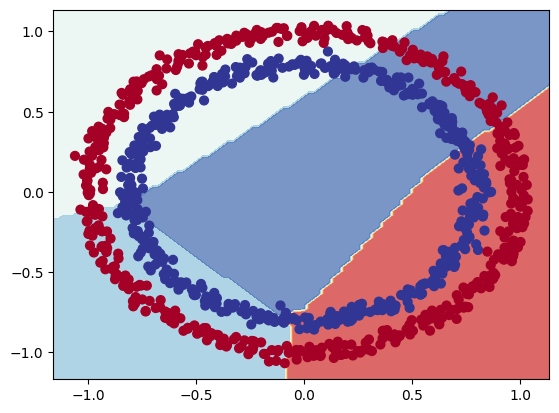

In [52]:
# Check the decision boundary for latest model
plot_decision_boundary(model=model_6,
                       X=X,
                       y=y)

## Tensorflow Playground

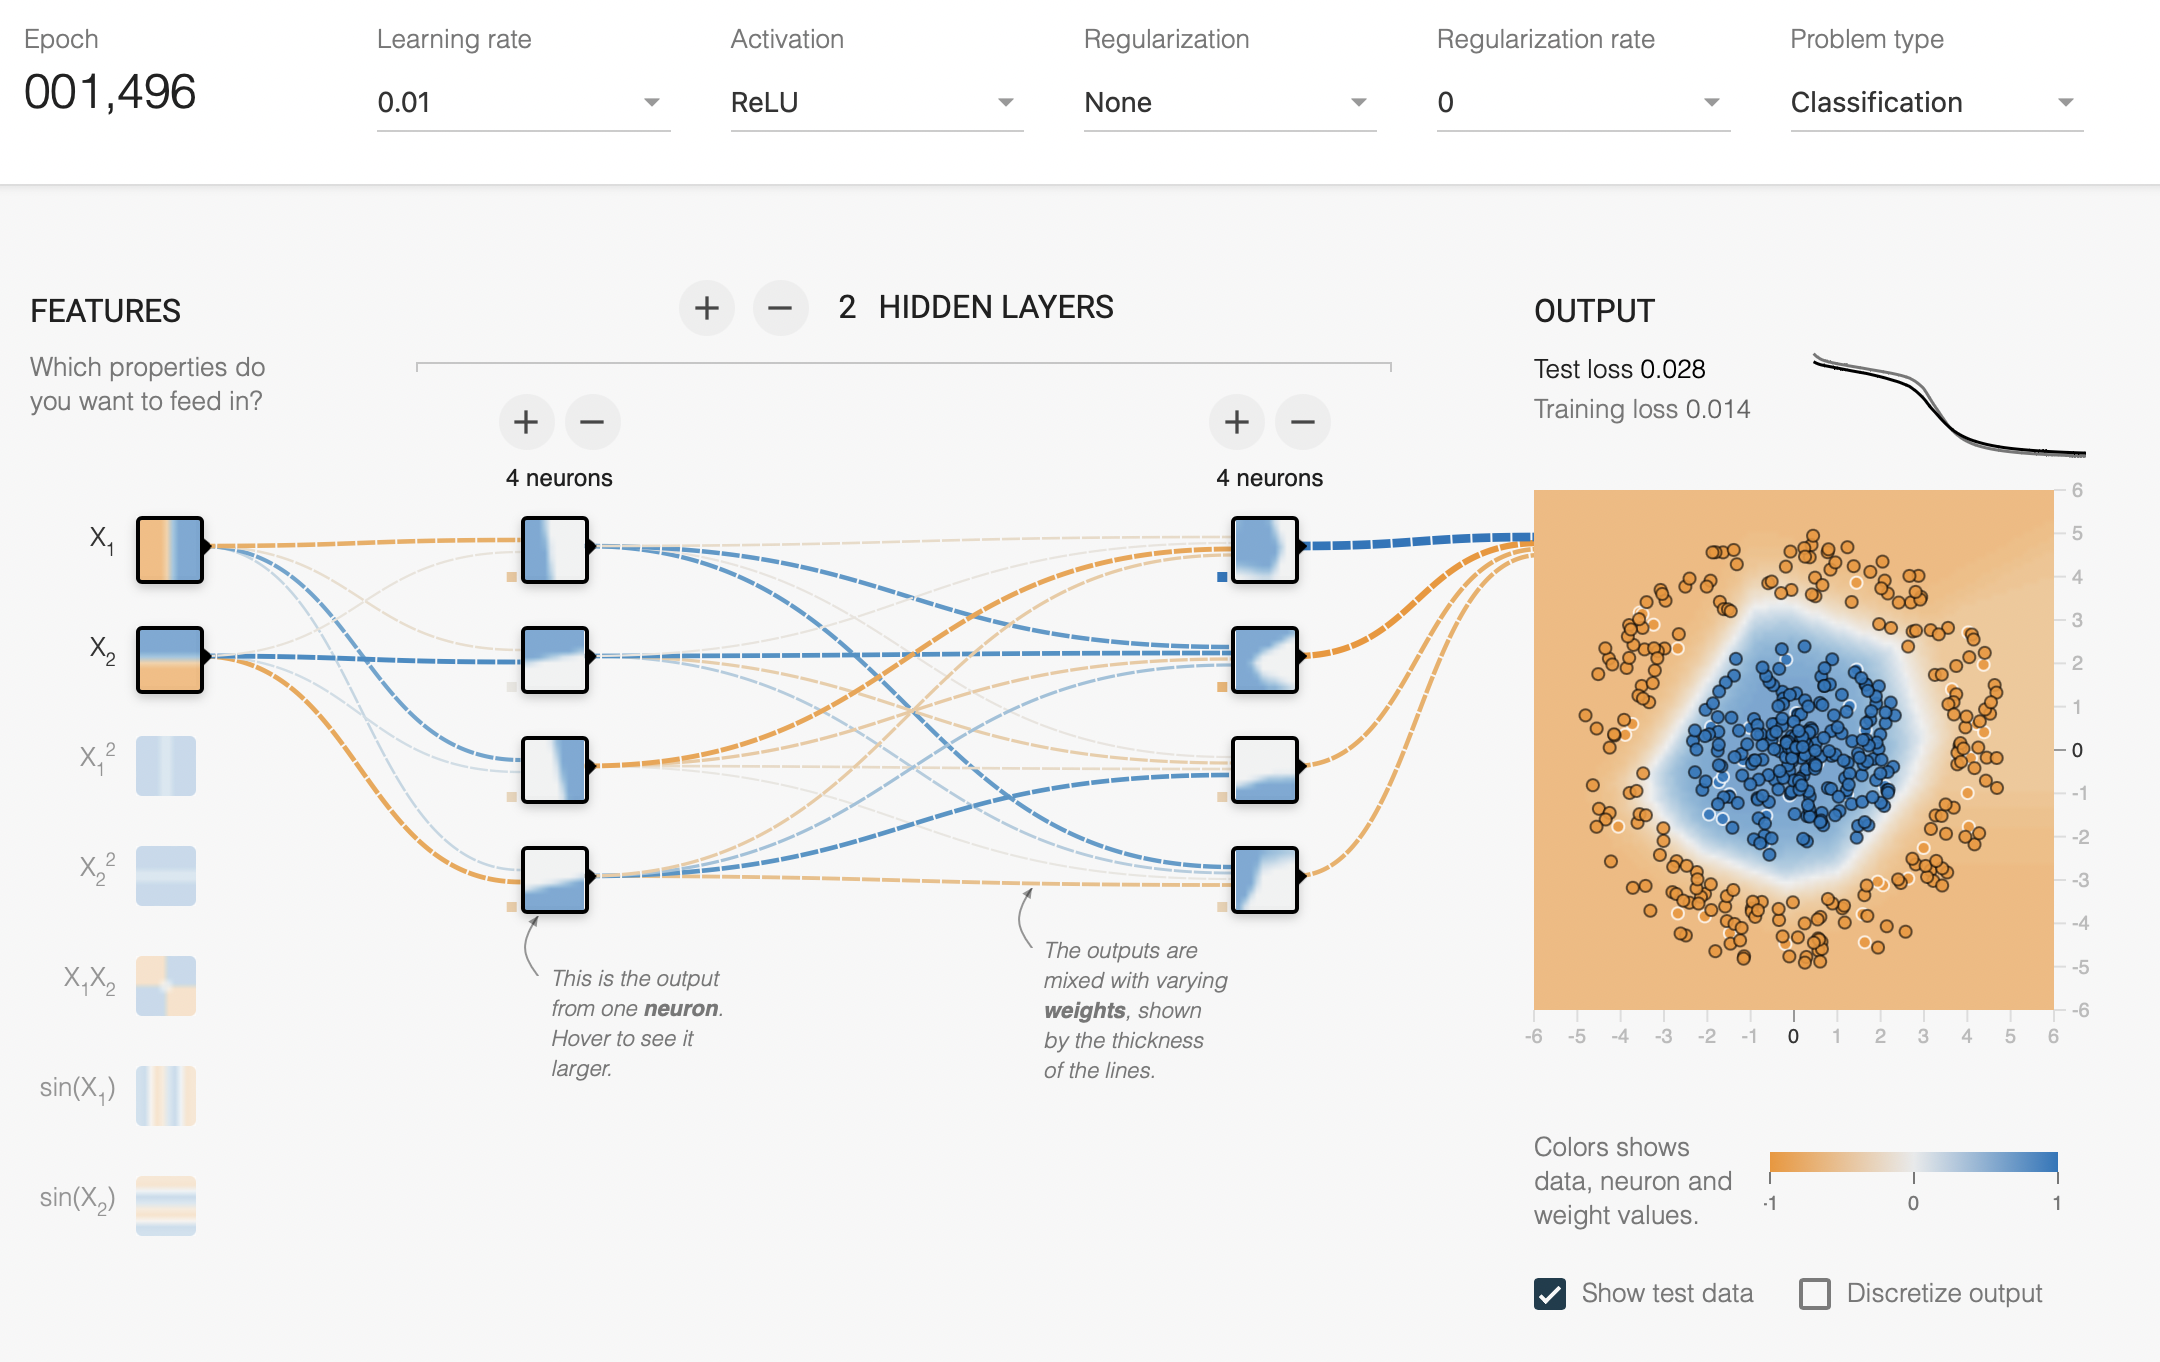

Text(0.5, 0, 'epochs')

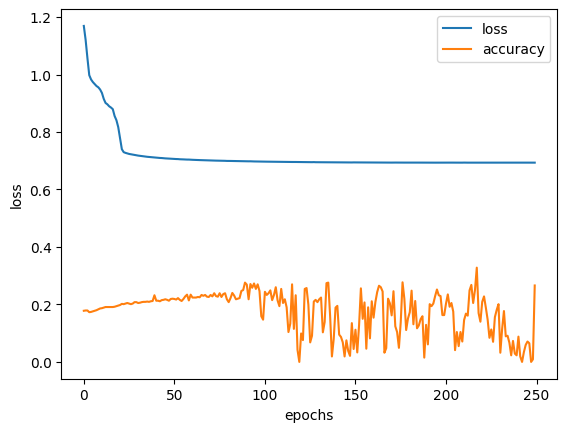

In [53]:
# Replication from tensorflow playground
#1. Set random seed
tf.random.set_seed(42)

#2. Create Model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1),

])

model_6.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

history = model_6.fit(X, y, epochs=250, verbose=0)

pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [54]:
pd.DataFrame({"loss": history.history['loss'][:10], "accuracy": history.history['accuracy'][:10]})

loss  accuracy
0  1.169089     0.178
1  1.120257     0.179
2  1.056545     0.179
3  0.997678     0.173
4  0.982810     0.174
5  0.973649     0.176
6  0.967049     0.178
7  0.959932     0.180
8  0.955482     0.183
9  0.947743     0.186

313/313 [==============================] - 0s 1ms/step
doing multiclass classification


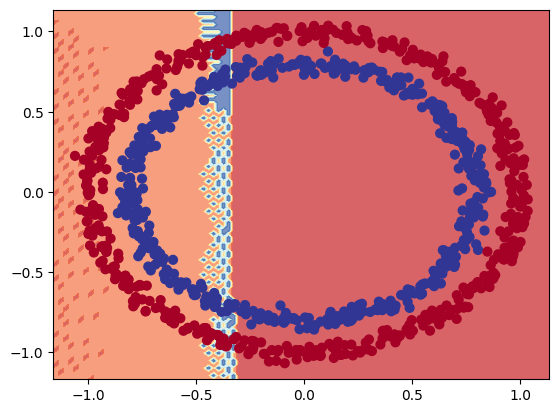

In [55]:
# Check the decision boundary for latest model
plot_decision_boundary(model=model_6,
                       X=X,
                       y=y)

Text(0.5, 0, 'epochs')

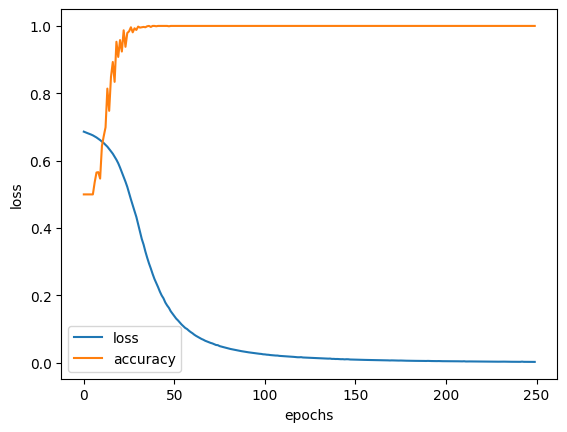

In [56]:
# Change Hyperparameters by using sigmoid activation on output layer 
#1. Set random seeder
tf.random.set_seed(42)

#2. Create Model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

#3. Compile Model
model_7.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)
#4. Fit Model
history = model_7.fit(X, y, epochs=250, verbose=0)

#5. History Model
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [57]:
pd.DataFrame({"loss": history.history['loss'][40:50], "accuracy": history.history['accuracy'][40:50]})

loss  accuracy
0  0.237119     0.999
1  0.224834     1.000
2  0.211492     1.000
3  0.200114     1.000
4  0.191479     1.000
5  0.179230     1.000
6  0.170473     1.000
7  0.163197     0.999
8  0.153182     1.000
9  0.145768     1.000

313/313 [==============================] - 1s 4ms/step
doing binary classification


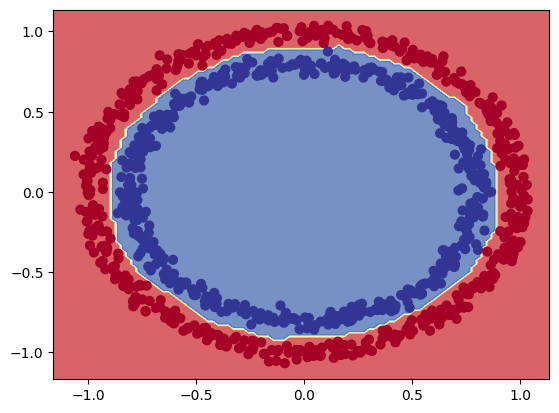

In [58]:
plot_decision_boundary(model=model_7,
                       X=X,
                       y=y)

In [59]:
model_7.evaluate(X, y)

32/32 [==============================] - 1s 6ms/step - loss: 0.0027 - accuracy: 1.0000


[0.002748766914010048, 1.0]

In [60]:
model_6.evaluate(X, y)

32/32 [==============================] - 1s 7ms/step - loss: 0.6932 - accuracy: 0.3560


[0.6931536197662354, 0.35600000619888306]

In [61]:
model_5.evaluate(X, y)

32/32 [==============================] - 0s 5ms/step - loss: 0.7773 - accuracy: 0.4910


[0.7773481011390686, 0.4909999966621399]

🤔 **Question**: What's wrong the predictions we've made? Are we really evaluating our model correctly? Hint: what data did the model learn on and what data did we predict on?

🔑 **Note**: The combination of **linear (straight lines)** and **non-linear (non-straight lines)** functions is one of the key fundamentals of neural networks.

Now we've discussed the concept of **linear and non-linear functions (or lines)**, let's see them in action.

In [62]:
# Toy tensor similar to the others
A = tf.cast(range(-10,10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

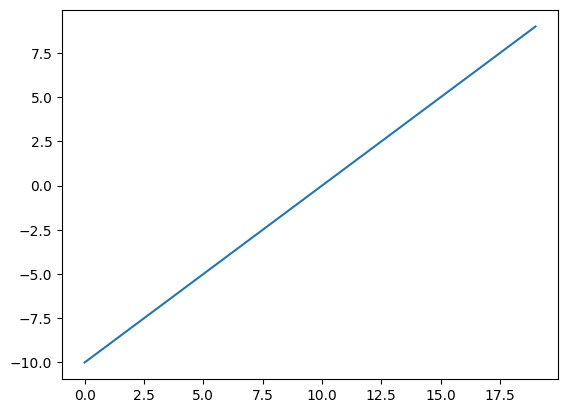

In [63]:
plt.plot(A)

# Sigmoid Function

A sigmoid function is a bounded, differentiable, real function that is defined for all real input values and has a non-negative derivative at each point and exactly one inflection point. A sigmoid "function" and a sigmoid "curve" refer to the same object.

📖 **formula:**

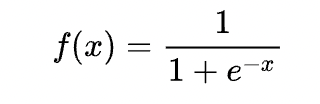


**Graphical Representation**:
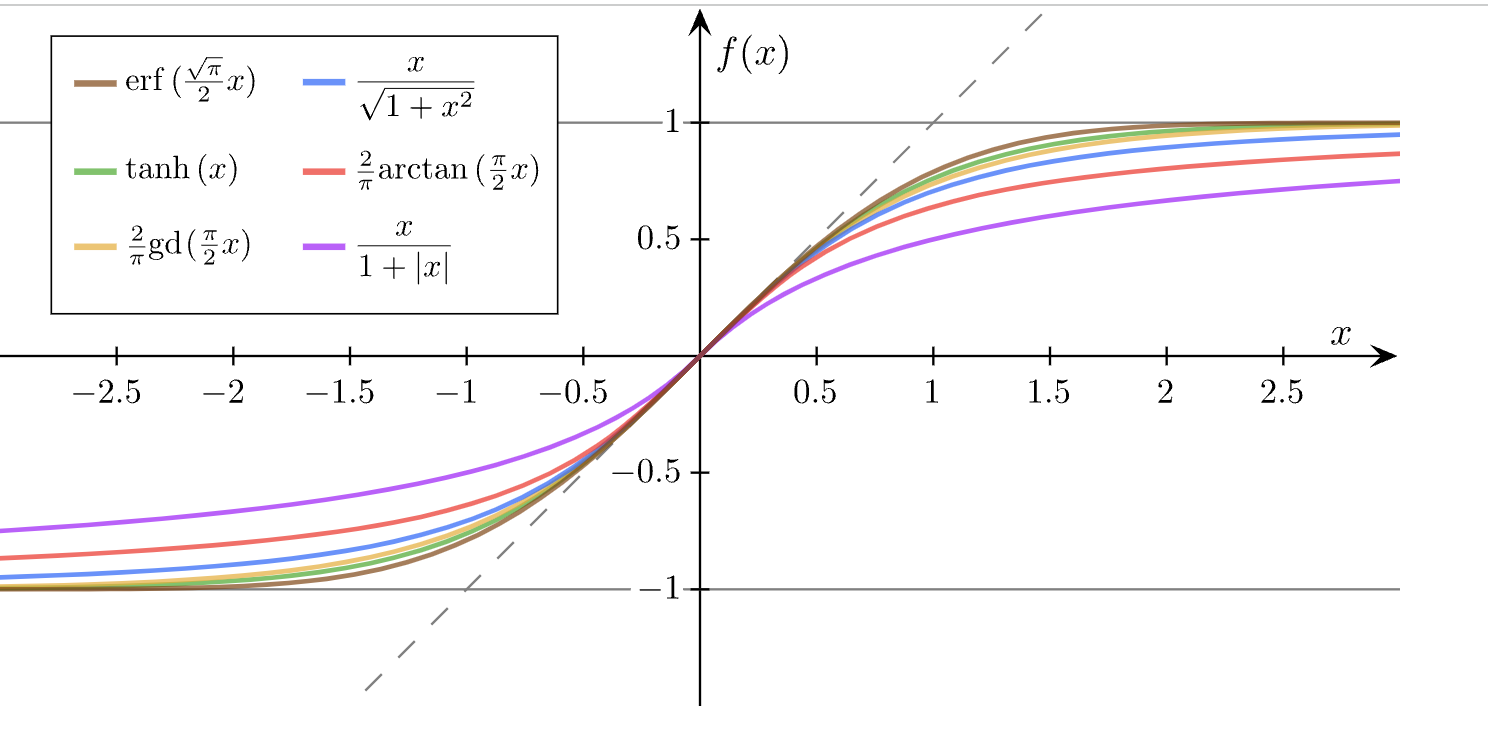

In [64]:
# Let's start by replicating sigmoid - sigmoid(x) = 1 / (1 + exp(-x))

def sigmoid(x):
  return 1./(1. + tf.exp(-x))

sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

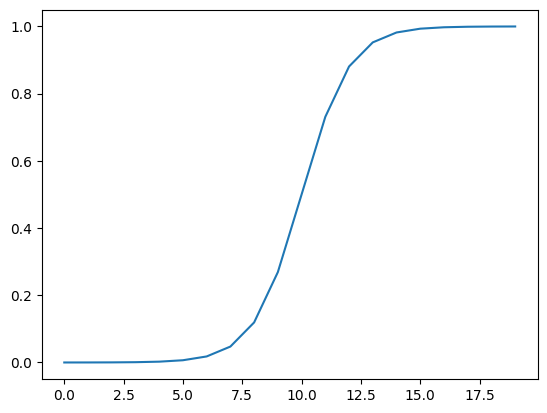

In [65]:
plt.plot(sigmoid(A))

In [66]:
# Let's recreate the relu function
def relu(x):
  return tf.maximum(0, x)

# Pass our toy tensor to our custom relu function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

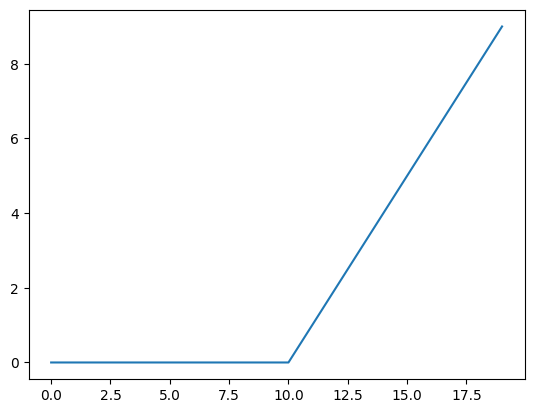

In [67]:
plt.plot(relu(A))

In [68]:
# Let's try the linear activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

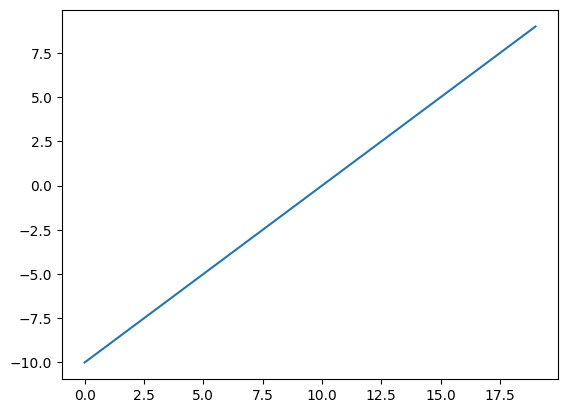

In [69]:
plt.plot(tf.keras.activations.linear(A))

In [70]:
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

In [71]:
A == relu(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

In [72]:
A == sigmoid(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])>

# Evaluating and improving our classificiation model

So far we've been training and testing on the same dataset...

However, in machine learning this is basically a sin.

So let's create a training and test set.

In [73]:
# Examples size
len(X)

1000

In [74]:
# Split into train and test sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

Text(0.5, 0, 'epochs')

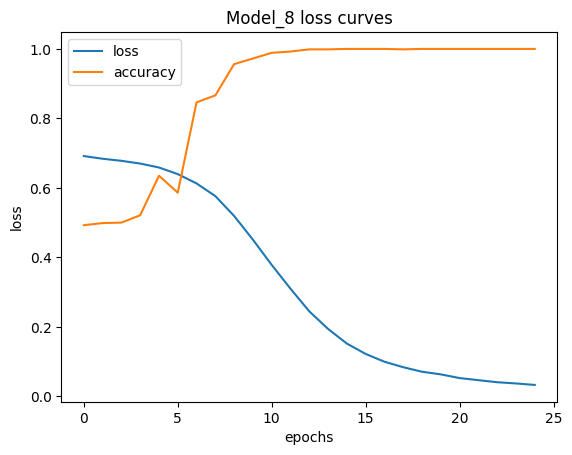

In [75]:
# Creating a model and tweeking learning rate value and evaluating results

#1. Set Randomness seeder
tf.random.set_seed(42)

#2. Create model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(100, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid),
])

#3. Compile model
model_8.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]

)

#4. Fit model
history = model_8.fit(X_train, y_train, epochs=25, verbose=0)

#5. Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss curves");
plt.ylabel("loss")
plt.xlabel("epochs")

313/313 [==============================] - 1s 2ms/step
doing binary classification


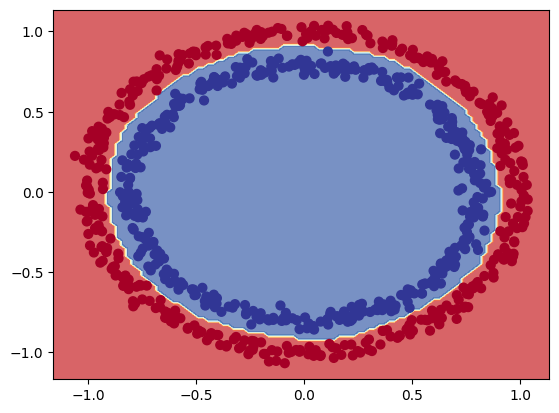

In [76]:
plot_decision_boundary(model=model_8,
                       X=X_train,
                       y=y_train)

In [77]:
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.0339 - accuracy: 1.0000


[0.033923398703336716, 1.0]

In [78]:
pred_8 = model_8.predict(X_test)

7/7 [==============================] - 0s 2ms/step


313/313 [==============================] - 1s 4ms/step
doing binary classification
313/313 [==============================] - 1s 4ms/step
doing binary classification


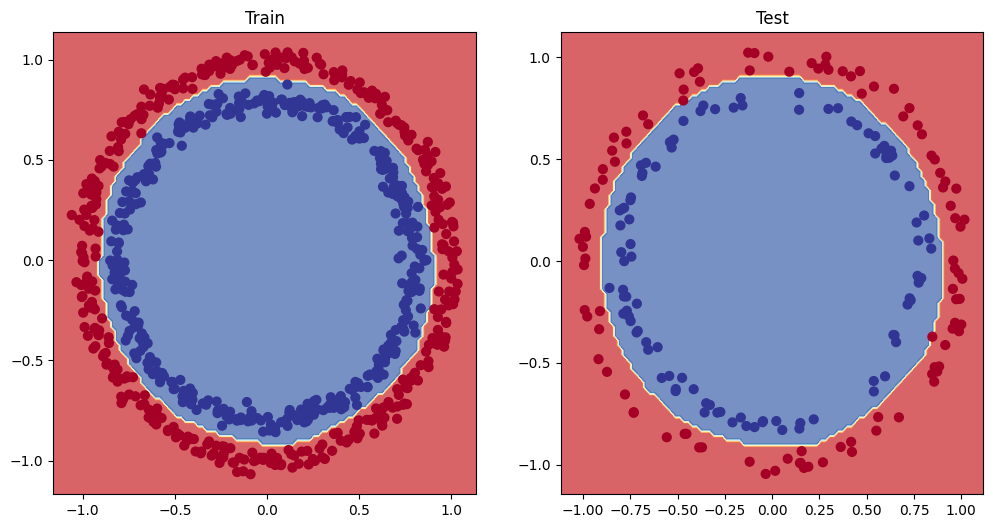

In [79]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show();

In [80]:
model_7.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 10)                30        
                                                                 
 dense_18 (Dense)            (None, 10)                110       
                                                                 
 dense_19 (Dense)            (None, 1)                 11        
                                                                 
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


## Plot the loss (or training) curves

In [81]:
# Convert the history object into a DataFrame
pd.DataFrame(history.history)[:10]

loss  accuracy
0  0.691647   0.49250
1  0.683899   0.49875
2  0.677925   0.50000
3  0.670040   0.52125
4  0.658709   0.63500
5  0.639607   0.58625
6  0.612842   0.84625
7  0.576371   0.86625
8  0.519242   0.95625
9  0.450970   0.97250

🔑 **Note**: For many problems, the loss function going down means the model is improving (the predictions it's making are getting closer to the ground truth labels).


# Finding the best learning rate

To find the ideal learning rate (the learning rate where the loss decreases the most during training) we're going to use the following steps:

* A learning rate **callback** - you can think of a callback as an extra piece of funtionality, you can add to your while its training.
* Another model (we could use the same one as above, but we're practicing building models here)
* A modified loss curves plot.

In [82]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as model_8)
model_9 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_9.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Fit the model (passing lr_scheduler callback)
history_9 = model_9.fit(X_train,
                        y_train, 
                        epochs=100,
                        verbose=0,
                        callbacks=[lr_scheduler])

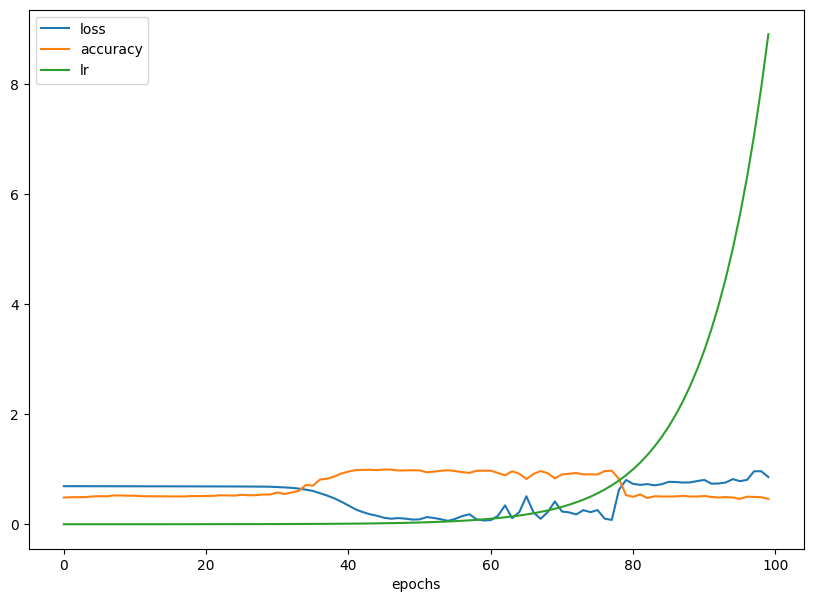

In [83]:
# Checkout the history
pd.DataFrame(history_9.history).plot(figsize=(10, 7), xlabel="epochs");

In [84]:
lrs = 1e-4 * 10**(tf.range(100)/20)
lrs[10:], lrs[:10]

(<tf.Tensor: shape=(90,), dtype=float64, numpy=
 array([3.16227766e-04, 3.54813389e-04, 3.98107171e-04, 4.46683592e-04,
        5.01187234e-04, 5.62341325e-04, 6.30957344e-04, 7.07945784e-04,
        7.94328235e-04, 8.91250938e-04, 1.00000000e-03, 1.12201845e-03,
        1.25892541e-03, 1.41253754e-03, 1.58489319e-03, 1.77827941e-03,
        1.99526231e-03, 2.23872114e-03, 2.51188643e-03, 2.81838293e-03,
        3.16227766e-03, 3.54813389e-03, 3.98107171e-03, 4.46683592e-03,
        5.01187234e-03, 5.62341325e-03, 6.30957344e-03, 7.07945784e-03,
        7.94328235e-03, 8.91250938e-03, 1.00000000e-02, 1.12201845e-02,
        1.25892541e-02, 1.41253754e-02, 1.58489319e-02, 1.77827941e-02,
        1.99526231e-02, 2.23872114e-02, 2.51188643e-02, 2.81838293e-02,
        3.16227766e-02, 3.54813389e-02, 3.98107171e-02, 4.46683592e-02,
        5.01187234e-02, 5.62341325e-02, 6.30957344e-02, 7.07945784e-02,
        7.94328235e-02, 8.91250938e-02, 1.00000000e-01, 1.12201845e-01,
        1.258925

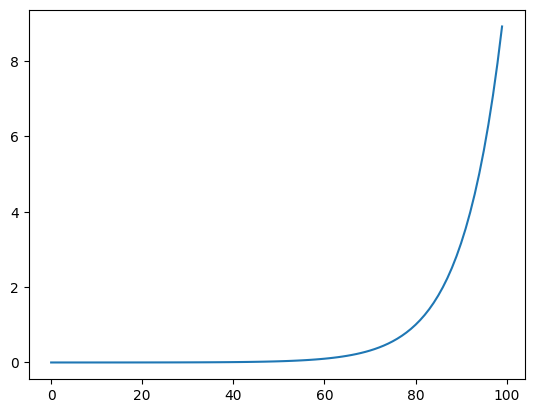

In [85]:
plt.plot(lrs)

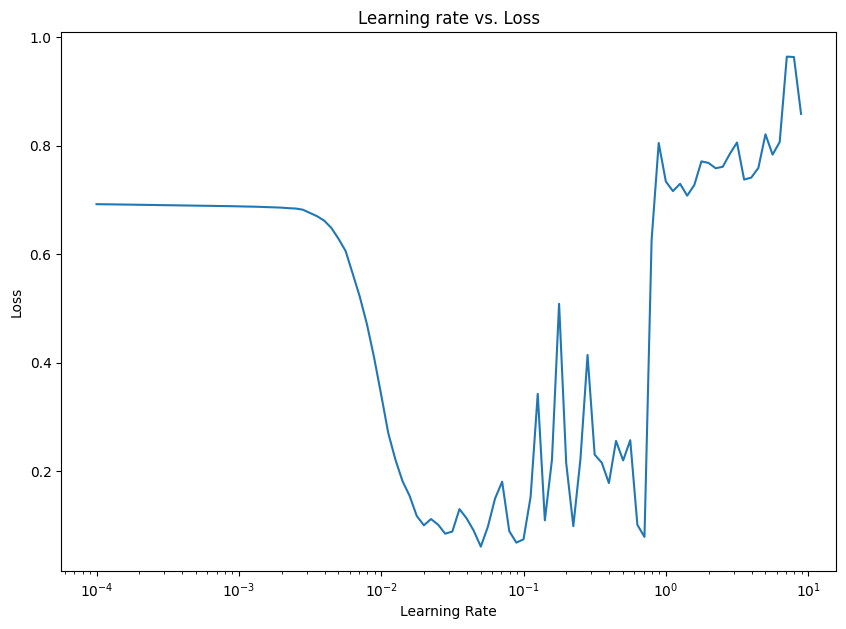

In [86]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. Loss");

In [87]:
#Typical examples of learining rates
10 **0, 10**-1, 10**-2, 10**-3, 10**-4

(1, 0.1, 0.01, 0.001, 0.0001)

Text(0.5, 0, 'epochs')

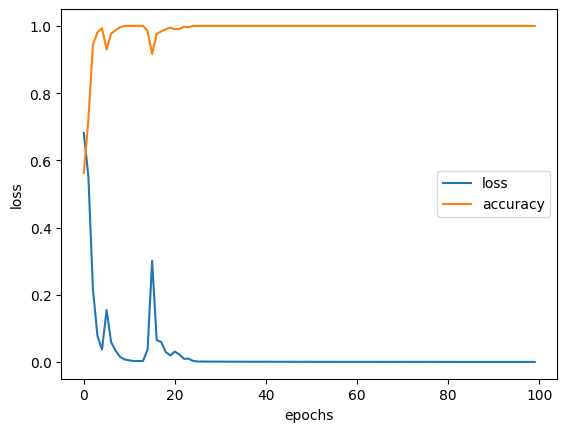

In [88]:
#1. Set randomness
tf.random.set_seed(42)
#2. Create Model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(100, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid),
])
#3. Compile Model
model_10.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
    metrics=["accuracy"]
)
#4. Define callback fucntion
learning_callback = tf.keras.callbacks.LearningRateScheduler(lambda epochs: 1e-2 * 10**(epochs/20))
#5. Fit the Model
history_10 = model_10.fit(X_train, y_train, epochs=100, verbose=0)
#6. Plot the history
pd.DataFrame(history_10.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

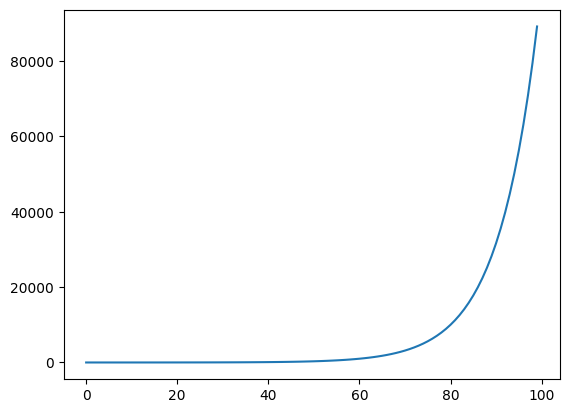

In [89]:
lrs_10 = 1**-2 * 10**(tf.range(100)/20)
plt.plot(lrs_10)

In [90]:
plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

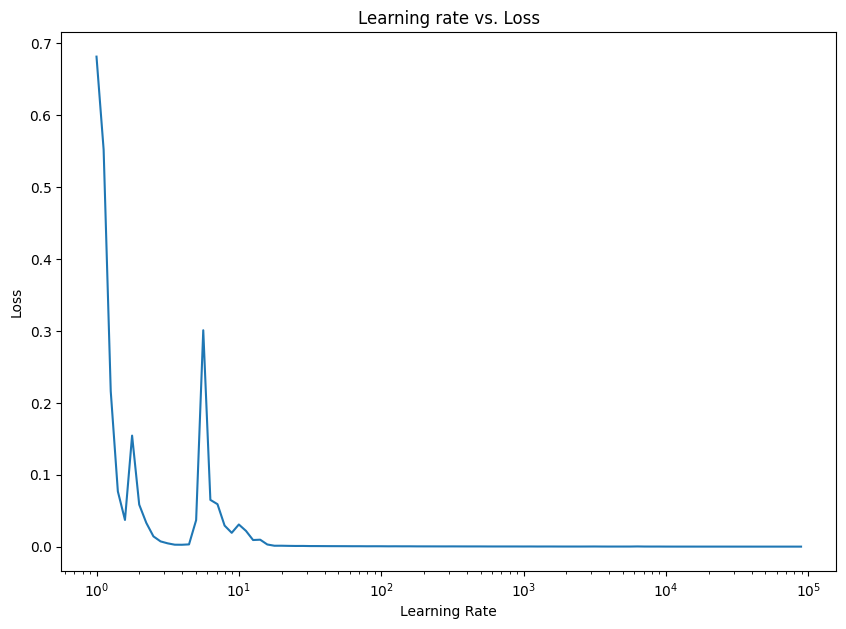

In [91]:
plt.figure(figsize=(10, 7))
plt.semilogx(lrs_10, history_10.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. Loss");

In [92]:
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.0026 - accuracy: 1.0000


[0.002559694927185774, 1.0]

In [93]:
model_9.evaluate(X_test, y_test)

7/7 [==============================] - 1s 5ms/step - loss: 0.6935 - accuracy: 0.4950


[0.6934692859649658, 0.4950000047683716]

In [94]:
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.0339 - accuracy: 1.0000


[0.033923398703336716, 1.0]

313/313 [==============================] - 1s 4ms/step
doing binary classification
313/313 [==============================] - 1s 2ms/step
doing binary classification


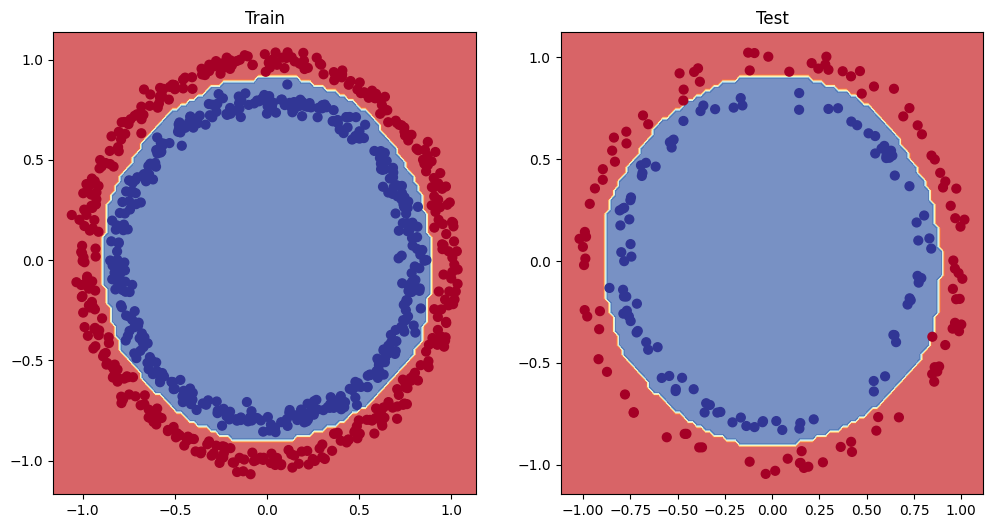

In [95]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_10, X=X_test, y=y_test)
plt.show()

## More classification evaluation methods

Alongside visualizing our models results as much as possible, there are a handful of other classification evaluation methods & metrics you should be familiar with:

* Accuracy
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification report (from scikit-learn) - [https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)

In [96]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 6ms/step - loss: 0.0026 - accuracy: 1.0000
Model loss on the test set: 0.002559694927185774
Model accuracy on the test set: 100.00%


In [97]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_10.predict(X_test)

# Create confusion matrix
#confusion_matrix(y_test, y_preds)

7/7 [==============================] - 0s 6ms/step


In [98]:
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [99]:
y_preds[:10]

array([[9.99998093e-01],
       [1.00000000e+00],
       [9.99999642e-01],
       [9.99999881e-01],
       [2.73054489e-03],
       [1.02286596e-10],
       [9.99984384e-01],
       [9.31956068e-10],
       [9.99999762e-01],
       [1.92412291e-08]], dtype=float32)

In [100]:
# Convert prediction probabilities to binary format and view the first 10
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [101]:
confusion_matrix(y_test, tf.round(y_preds))

array([[101,   0],
       [  0,  99]])

In [102]:
def plot_confusion_matrix(y_test, y_pred, classes=False):
  import itertools
  import numpy as np

  figsize = (10, 10)

  # Create the confusion matrix
  cm = confusion_matrix(y_test, tf.round(y_preds))
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  labels = classes or np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels, 
        yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(20)
  ax.xaxis.label.set_size(20)
  ax.title.set_size(20)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=15)

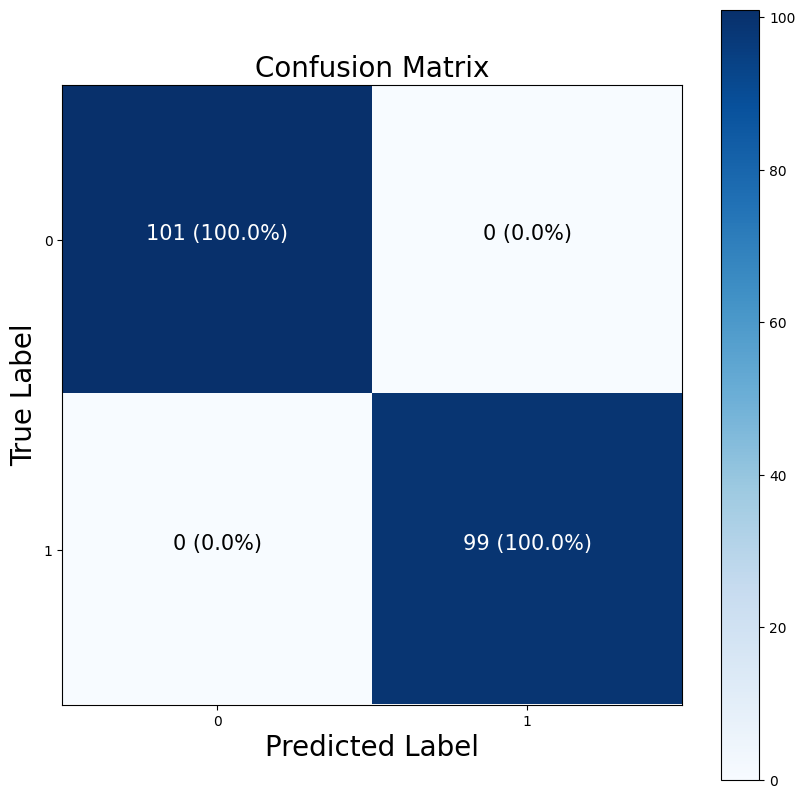

In [103]:
plot_confusion_matrix(y_test, y_preds)

## Working with a larger example (multiclass classification)

When you have more than two classes as an option, it's known as multi-class classification.

* This means if you have 3 different classes, it's multi-class classification.

* It also means if you have 100 different classes, it's multi-class classification.

* To practice mutli-class classificaiton, we're going to build a neural network to classify images of different items of clothing.

### Preparing the data

In [104]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [105]:
# Show the first training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [106]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

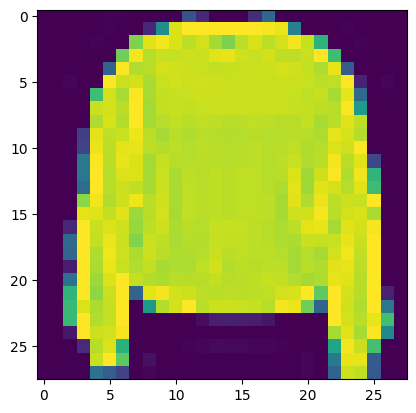

In [107]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[7]);

In [108]:
# Check out samples label
train_labels[7]

2

In [109]:
# Create a small list so we can index onto our training labels so they're human-readable 
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

len(class_names)

10

Text(0.5, 1.0, 'Coat')

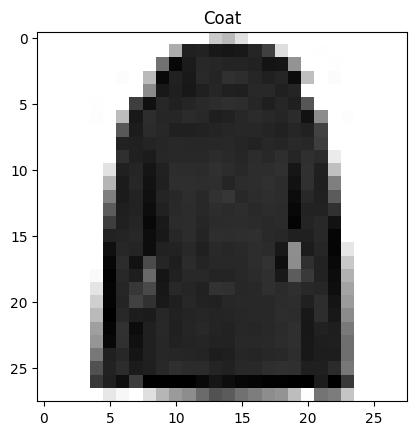

In [110]:
# Plot an example image and its label
index_of_choice = 2000
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

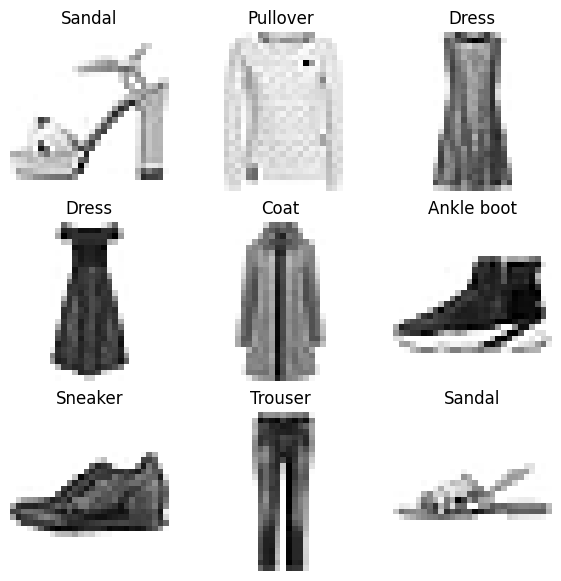

In [111]:
# Plot multiple random images of fashion MNIST
import random 
plt.figure(figsize=(7, 7))
for i in range(9):
  ax = plt.subplot(3, 3, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## Building a multi-class classification model

For our multi-class classification model, we can use a similar architecture to our binary classifiers, however, we're going to have to tweak a few things:

* Input shape = 28 x 28 (the shape of one image)
* Output shape = 10 (one per class of clothing)
* Loss function = tf.keras.losses.CategoricalCrosstentropy()
  * If your labels are one-hot encoded, use CategoricalCrossentropy()
  * If your labels are integer form use SparseCategoricalCrossentropy()
* Output layer activation = Softmax (not sigmoid)

In [112]:
# our data needs to be flattened (from 28*28 to None, 784)
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28))])
flatten_model.output_shape

(None, 784)

In [113]:
28 * 28

784

In [114]:
tf.one_hot(train_labels[:10], depth=10)

<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)>

In [115]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

# Compile the model
model_11.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
non_norm_history = model_11.fit(train_data,
                                tf.one_hot(train_labels, depth=10),
                                epochs=10,
                                validation_data=(test_data, tf.one_hot(test_labels, depth=10)))

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 2.6270 - accuracy: 0.1091 - val_loss: 2.2657 - val_accuracy: 0.1170
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 2.0134 - accuracy: 0.1929 - val_loss: 1.8446 - val_accuracy: 0.2532
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 1.7742 - accuracy: 0.2500 - val_loss: 1.8248 - val_accuracy: 0.2728
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 1.7050 - accuracy: 0.2591 - val_loss: 1.8104 - val_accuracy: 0.2588
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 1.6651 - accuracy: 0.2827 - val_loss: 1.8187 - val_accuracy: 0.2626
Epoch 6/10
1875/1875 [==============================] - 8s 5ms/step - loss: 1.6317 - accuracy: 0.2960 - val_loss: 1.6564 - val_accuracy: 0.3002
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5824 - accuracy: 0.3311 - val_loss: 1.6060 - val_accu

In [116]:
# Check the model summary
model_11.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_29 (Dense)            (None, 4)                 3140      
                                                                 
 dense_30 (Dense)            (None, 4)                 20        
                                                                 
 dense_31 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [117]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

In [129]:
#Create a second multiclass classification model

#1. Set random seed
tf.random.set_seed(42)

#2. Create model 1 flatter layer, 2 hidden layers, 1 output layer with softmax
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

#3. Compile the model
model_12.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"]
                 )

#4. Fit the model
history_12 = model_12.fit(train_data, train_labels, epochs=10, verbose=0)
#history_12 = model_12.fit(train_data, train_labels, epochs=10, verbose=0, validation_data=(test_data, test_labels))
history_12

Text(0.5, 0, 'epochs')

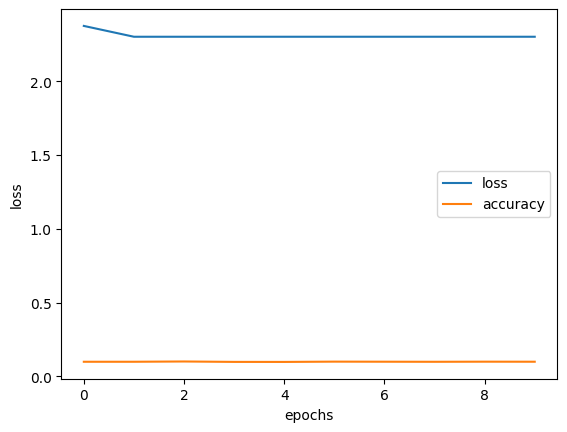

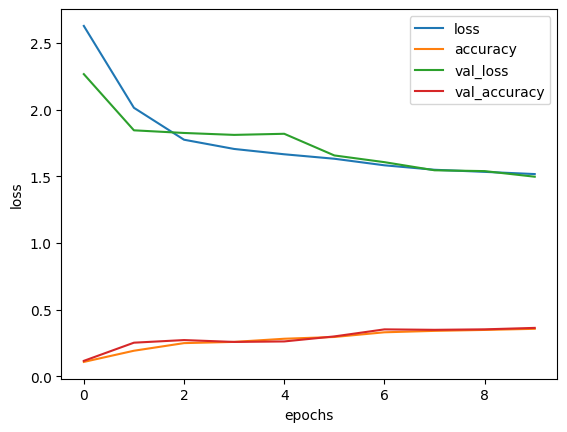

In [131]:
pd.DataFrame(history_12.history).plot() #without valudation data
plt.ylabel("loss")
plt.xlabel("epochs")
pd.DataFrame(non_norm_history.history).plot() #with validation data
plt.ylabel("loss")
plt.xlabel("epochs")

## Normalizing our data
Neural networks prefer data to be scaled (or normalized), this means they like to have the numbers in the tensors they try to find patterns between 0 & 1.

In [134]:
# We can get our training and testing data between 0 & 1 by dividing by the maximum
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# check the min and max values of the scaled training data
train_data_norm.min(), train_data_norm.max(), train_data.min(), test_data.max()

(0.0, 1.0, 0, 255)

In [142]:
# Creating a model with normalized train data and trained

#1. set random seed
tf.random.set_seed(42)

#2. create a model
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

#3. compile a model
model_13.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])
#4. fit a model
history_13 = model_13.fit(
    train_data_norm,
    tf.one_hot(train_labels, depth=10),
    epochs=10,
    verbose=0,
    validation_data=(test_data_norm, tf.one_hot(test_labels, depth=10)))

In [143]:
#5. Plot history

Text(0.5, 0, 'epochs')

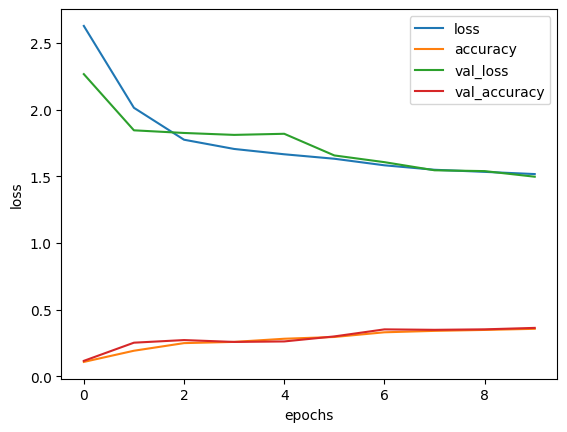

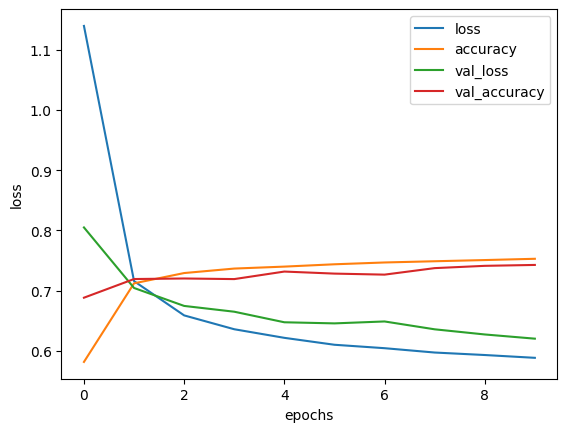

In [147]:
pd.DataFrame(non_norm_history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")
pd.DataFrame(history_13.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")